In [3]:
from polynomial_regression import PolynomialRegression
from linear_regression import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def non_linear(x):
    return np.sin(x)

In [3]:
def make_data(start, stop, sample):
    X = np.linspace(start, stop, sample)
    y = non_linear(X)
    return X.reshape(-1,1) , np.array(y).reshape(-1,1)

In [11]:
X, y = make_data(0, 5, 1000)

In [12]:
X.shape

(1000, 1)

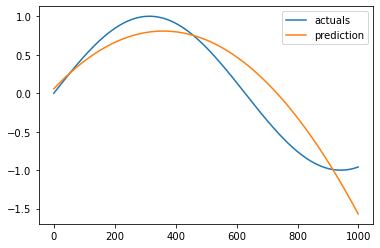

In [13]:
plt.plot(y, label = 'actuals')
plt.plot(pr.predict(X), label = 'prediction')
plt.legend()

In [6]:
# Gradient Exploding?
pr = PolynomialRegression(degrees=2, optimizer = 'SGD')
pr.train(X, y, batch_size = 20, verbose = True,
        epochs = 10, learning_rate = 0.01)

Epoch 0 Loss is : 395.8958546876975
Epoch 1 Loss is : 156.03238192089015
Epoch 2 Loss is : 128.7479144940183
Epoch 3 Loss is : 154.86028077185372
Epoch 4 Loss is : 98.30166592114762
Epoch 5 Loss is : 125.20878647859776
Epoch 6 Loss is : 136.83881781800125
Epoch 7 Loss is : 75.83463475297887
Epoch 8 Loss is : 75.56629543490666
Epoch 9 Loss is : 75.41267654200016


In [7]:
weights = pr.optimized_weights

In [8]:
weights

array([[ 0.05711118],
       [ 0.83425857],
       [-0.23187381]])

In [9]:
X = pr.polynomial_transform(X)
X = np.hstack((np.ones((X.shape[0], 1), dtype = X.dtype), X))

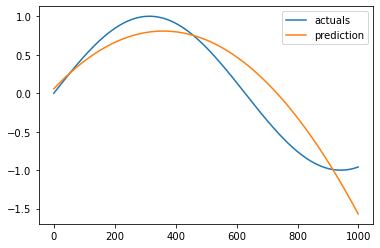

In [10]:
plt.plot(y, label = 'actuals')
plt.plot((X @ weights), label = 'prediction')
plt.legend()